<a href="https://colab.research.google.com/github/Krai-17/Swiggy-EDA-Data-Visualisation/blob/main/EDA%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Swiggy dataset EDA and Analysis**

#### Food delivery has become one of the prominent services adopted by the restaurant industry. The metropolitan cities are getting busier and hooked up to work so the people prefer ordering food online as they seldom find time to buy groceries and cook food. Start-up’s such as Swiggy, Zomato, Dunzo etc. are huge choice of medium for delivering food at their door steps. The food delivery is highly prevailing in the metropolitan cities. 

#### * Customers provide rating once the order is completed and these ratings depend on many factors such as:
                 * quality, quantity,etc. of the food.
                 * delivery time
                 * Cost of food and delivery
                 * behavior of staff

#### Customer orders from the same restaurant again if the food quality is good and also from the same service provider if the delivery service is satisfying and thus creating a demand of that restaurant food and delivery service.
#### Hence it is an important job to analyse the data and figure out ways to remove issues and improve the brand service and value.



## **Context of datset**
#### The dataset used in this project is sourced from kaggle. It contains Restaurants/Food Outlets in Top 50 most populous cities in India, but the list only contains 49 cities as Swiggy does not provide services in Srinagar.

## Import libraries
#### Importing libraries required for eda and visulaisation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Uderstanding the data
#### We'll start by exploring the data, its shape, size, features, types of values in rows and columns,etc to get the basic understanding of the dataset

In [ ]:
data=pd.read_csv(r"C:\Users\Kritika Rai\Downloads\archive (6)\Swiggy_50.csv")

#### Creatinga copy of the original dataset to access deleted values if needed

In [ ]:
dataset=data.copy()

#### Shape of dataset(rows,columns): (31804, 10)

In [ ]:
data.shape

(31804, 10)

## Peeking the dataset

In [ ]:
data.head()

,Restaurant Name,Category,Rating,Cost for two,Veg,city,Area,Locality,Address,Long Distance Delivery
0,KFC,"American,Snacks,Biryani",3.9,400,False,Delhi,Paharganj,KFC Paharganj,"KFC Restaurant 2154, Desh Bandhu Gupta Road, N...",0
1,McDonald's,American,4.3,400,False,Delhi,Kashmere Gate,Delhi ISBT DMRC (GF),"Delhi ISBT DMRC,ISBT DMRC Railway Station. Kas...",0
2,Haldiram's,"Sweets,Snacks,North Indian",4.0,350,True,Delhi,Chandni Chowk,Chandni Chowk,1452/2 Near Fountain Chandni Chowk Delhi 110015,0
3,Chai Point,"Bakery,Beverages,Maharashtrian,Snacks,Street F...",4.2,150,False,Delhi,Connaught Place,Connaught Place,"Shop No - B1, B Block Middle circle , Connaugh...",0
4,Bikanervala Chandni Chowk,"Street Food,Sweets",4.1,400,False,Delhi,Old Delhi,Old Delhi,"382, NEAR FATEH PUR, CHANDNI CHOWK,110006",0


## Data Content
#### The dataset has 10 variables namely:
    * Restaurant Name
    * Category
    * Rating                  
    * Cost for two              
    * Veg                        
    * city                     
    * Area                     
    * Locality                 
    * Address                 
    * Long Distance Delivery 

#### We will start be checking for duplicates and dropping them if present

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31804 entries, 0 to 31803
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Restaurant Name         31804 non-null  object 
 1   Category                31804 non-null  object 
 2   Rating                  14138 non-null  float64
 3   Cost for two            31804 non-null  int64  
 4   Veg                     31804 non-null  bool   
 5   city                    31804 non-null  object 
 6   Area                    31804 non-null  object 
 7   Locality                31780 non-null  object 
 8   Address                 31802 non-null  object 
 9   Long Distance Delivery  31804 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 2.2+ MB


#### The above information shows:
        * that out of 10 columns, 3 are numerical, 1 is boolean and rest 6 object type
        * Some of the fields have null values
        * There are no duplicates

#### Next, the null values need to be handled for cleaning the data and making it useful for visualisation

In [ ]:
data.isnull().sum()

Restaurant Name               0
Category                      0
Rating                    17666
Cost for two                  0
Veg                           0
city                          0
Area                          0
Locality                     24
Address                       2
Long Distance Delivery        0
dtype: int64

#### From above table, it shows that the fields Rating, Locality and Address have null values(in ascending order).

#### Firstly, Address column can be dropped as the exact address of the customer is not needed, only the locality is required which present seperately in the dataset

In [ ]:
#removing 'Address'
data.drop(['Address'],inplace=True,axis=1)

In [ ]:
data.info() # Columns after deleting 'Address' 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31804 entries, 0 to 31803
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Restaurant Name         31804 non-null  object 
 1   Category                31804 non-null  object 
 2   Rating                  14138 non-null  float64
 3   Cost for two            31804 non-null  int64  
 4   Veg                     31804 non-null  bool   
 5   city                    31804 non-null  object 
 6   Area                    31804 non-null  object 
 7   Locality                31780 non-null  object 
 8   Long Distance Delivery  31804 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 2.0+ MB


#### Next, the null values in 'Locality' can be filled with 'NA' as filling out with assumed values is not appropriate

In [ ]:
data['Locality'].fillna('NA',inplace=True)

In [ ]:
data.isnull().sum() # Checking if the values are filled

Restaurant Name               0
Category                      0
Rating                    17666
Cost for two                  0
Veg                           0
city                          0
Area                          0
Locality                      0
Long Distance Delivery        0
dtype: int64

#### Lastly, the null values in 'Rating' can be filled with 0 as the ratings start from 1, making them as outliers 

In [ ]:
data['Rating'].fillna(0,inplace=True)

In [ ]:
data.isnull().sum() # checking to see if the null values are removed

Restaurant Name           0
Category                  0
Rating                    0
Cost for two              0
Veg                       0
city                      0
Area                      0
Locality                  0
Long Distance Delivery    0
dtype: int64

## Insights

In [ ]:
data.describe()

,Rating,Cost for two,Long Distance Delivery
count,31804.000000,31804.000000,31804.000000
mean,1.737131,289.795592,0.358414
std,1.965553,174.896346,0.479542
min,0.000000,0.000000,0.000000
25%,0.000000,200.000000,0.000000
50%,0.000000,250.000000,0.000000
75%,3.900000,300.000000,1.000000
max,5.000000,3100.000000,1.000000


In [ ]:
data['Long Distance Delivery'].unique()

array([0, 1], dtype=int64)

#### Insights
    * The dataset has more categorical variables than continuous variables
    * We have 31804 values in each variable
    * Rating ranges from 0-5 with avg of 1.7
    * Cost for two ranges from Rs.0-3100 with mean of approx. Rs.290
    * Long Distance Delivery has two values (0,1) with median of 0

### Conclusions
    * Rating should be checked for outliers as rating of 0 is used for null values amd rating are in range 1-5
    * Cost for two cannot be 0 as shown by the table i.e. min=0

#### Checking rows having 'Cost for two' as 0

In [ ]:
data[data['Cost for two']<1]

,Restaurant Name,Category,Rating,Cost for two,Veg,city,Area,Locality,Long Distance Delivery
2555,Manik'S Modern Fresh Popcorn,Snacks,4.6,0,True,Mumbai,Matunga,Matunga,1
12142,New Chappan Bhog,"Sweets,Snacks",4.1,0,False,Cawnpore,Khyora,Nagar Nigam Market,0
18314,Prakash Vegetables And Fruits,8:15 To 11:30 Pm,0.0,0,False,Chinchvad,Pimple Saudagar,Vishwashanti Colony No 4,1
30209,Ferns n Petal,Indian,0.0,0,False,Chandigarh,North Mohali,mohali,1


#### Dropping the 4 rows having Cost for two as 0

In [ ]:
data.drop(data[(data['Cost for two']==0)].index, inplace=True)

#### Describing the continuous columns again to changed values after dropping

In [ ]:
data.describe()

,Rating,Cost for two,Long Distance Delivery
count,31800.000000,31800.000000,31800.000000
mean,1.737075,289.832044,0.358365
std,1.965518,174.877141,0.479528
min,0.000000,1.000000,0.000000
25%,0.000000,200.000000,0.000000
50%,0.000000,250.000000,0.000000
75%,3.900000,300.000000,1.000000
max,5.000000,3100.000000,1.000000


#### From the table its visible that minimum Cost for two is not 0 anymore

## Removing outliers

#### Plotting Rating variable to check for outliers

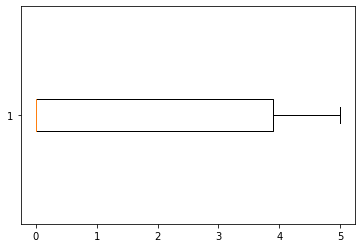

In [ ]:
np.random.seed(10)
#plt.figure(figsize =(10, 7))
 
plt.boxplot(data['Rating'], vert=False) # Creating plot 

plt.show() # showing figure

In [ ]:
outlier_index=np.where(data['Rating']<1)
outlier_index

(array([    8,     9,    17, ..., 31797, 31798, 31799], dtype=int64),)

In [ ]:
data[data['Rating']<1].value_counts().sum()

17664

### Finding the most popular restaurants (No. of orders)

In [ ]:
data1=data['Restaurant Name'].value_counts()[0:20]
data1

Pizza Hut                                          44
Kwality Walls Frozen Dessert and Ice Cream Shop    42
NIC Natural Ice Creams                             42
KFC                                                41
Baskin Robbins                                     41
The Good Bowl                                      39
Grameen Kulfi                                      39
The Biryani Life                                   39
McDonald's                                         38
Behrouz Biryani                                    38
Oven Story Pizza                                   37
The Belgian Waffle Co.                             37
Subway                                             37
LunchBox - Meals and Thalis                        37
Faasos - Wraps & Rolls                             36
Pure Veg Meals by Lunchbox                         35
Cafe Coffee Day                                    35
Firangi Bake                                       35
Faasos' Signature Wraps & Ro

In [ ]:
data1.shape

(20,)

In [ ]:
data2=data1[:]

In [ ]:
data2

Pizza Hut                                          44
Kwality Walls Frozen Dessert and Ice Cream Shop    42
NIC Natural Ice Creams                             42
KFC                                                41
Baskin Robbins                                     41
The Good Bowl                                      39
Grameen Kulfi                                      39
The Biryani Life                                   39
McDonald's                                         38
Behrouz Biryani                                    38
Oven Story Pizza                                   37
The Belgian Waffle Co.                             37
Subway                                             37
LunchBox - Meals and Thalis                        37
Faasos - Wraps & Rolls                             36
Pure Veg Meals by Lunchbox                         35
Cafe Coffee Day                                    35
Firangi Bake                                       35
Faasos' Signature Wraps & Ro